# K-Nearest Neighbors (KNN) Workshop

This notebook demonstrates **KNN classification implemented from scratch** and organized using a simple **Machine Learning Pipeline Pattern**.

## Learning goals
By the end, you should be able to:
- Explain how KNN classifies a new point using its **k** nearest neighbors
- Prepare data for distance-based models (split + scale)
- Train and evaluate a KNN classifier
- Compare performance for different values of **k**

## What we will do
1. **Acquire data** (Iris dataset as a stand‑in for CSV / API / Database)
2. **Split** into train/test sets
3. **Standardize features** (important for distance calculations)
4. **Train + predict** with KNN
5. **Evaluate** results (accuracy, confusion matrix, classification report)
6. **Tune `k`** and visualize accuracy

## Project structure (where the code lives)
```text
KNN_Workshop_Pipeline/
  src/          # pipeline + KNN implementation (from scratch)
  notebooks/    # this notebook
  scripts/      # terminal runners (optional)
  data/         # sample datasets (optional)
```

> **Important (common error):** If you see `ModuleNotFoundError: No module named 'src'`, your notebook/script is not running from the project root.  
> **Fix:** open the project folder (the one that contains `src/`) in VS Code, or add the project root to `sys.path` (Troubleshooting section at the end).


In [1]:
# --- Make sure the project root is on Python path ---
import sys
from pathlib import Path

here = Path().resolve()

# If notebook is in /notebooks, project root is one level up
candidates = [here, here.parent] + list(here.parents)

project_root = None
for p in candidates:
    if (p / "src").exists():
        project_root = p
        break

if project_root is None:
    raise FileNotFoundError("Could not find 'src' folder above this notebook. Open the project folder in VS Code and try again.")

sys.path.insert(0, str(project_root))
print("Project root:", project_root)


Project root: C:\Users\kevin\Downloads\KNN_Workshop_Pipeline\KNN_Workshop_Pipeline


In [2]:
# --- Imports (run first) ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from src.pipeline import run_knn_pipeline


## 1) Data acquisition

For workshop simplicity, we use the built-in **Iris** dataset (from scikit-learn). In a real project, this step could load data from:
- a **CSV file** (`pd.read_csv(...)`)
- an **API** (`requests.get(...)`)
- a **relational database** (SQL query)

### About the Iris dataset
- **150** flower samples
- **4 numeric features:** sepal length, sepal width, petal length, petal width
- **3 classes:** setosa, versicolor, virginica

**Data format used in this notebook**
- `X` is a 2D NumPy array with shape **(n_samples, n_features)**
- `y` is a 1D NumPy array of labels with shape **(n_samples,)**


In [3]:
iris = load_iris()
X = iris.data.astype(float)
y = iris.target

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", iris.target_names)


X shape: (150, 4)
y shape: (150,)
Classes: ['setosa' 'versicolor' 'virginica']


## 2) Run the pipeline once

Our pipeline function `run_knn_pipeline(...)` executes the main ML workflow:

| Step | What happens | Why it matters |
|---|---|---|
| 1 | Train/test split | Measures how well the model generalizes |
| 2 | Standardization (optional) | Prevents large-scale features from dominating distance |
| 3 | Train KNN | Stores training points (lazy learning) |
| 4 | Predict | Majority vote among the *k* closest neighbors |
| 5 | Evaluate | Quantifies performance and error patterns |

### Why standardization is important for KNN
KNN is **distance-based**. If one feature has much larger values than others, it can dominate the distance calculation and hurt accuracy.

> **No data leakage:** We compute mean/std using **training data only**, then apply the same transform to the test set.


In [4]:
result = run_knn_pipeline(X, y, k=5, distance="euclidean", test_size=0.2, seed=42, standardize=True)

print("Accuracy:", round(result.accuracy, 3))
print("Confusion matrix:\n", result.confusion_matrix)
print("\nClassification report:\n", result.classification_report)


Accuracy: 1.0
Confusion matrix:
 [[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 3) Tune `k` (number of neighbors)

The choice of **k** controls the model’s complexity:

- **Small `k`** (e.g., 1–3): very flexible, can **overfit** (sensitive to noise)
- **Large `k`** (e.g., 11–15): smoother decision boundary, can **underfit**

In this notebook we do a quick check on a **single train/test split** (with a fixed random seed for reproducibility).  
In a larger project, you would typically tune `k` using **cross-validation**.

We will:
1. try several `k` values
2. record accuracy for each
3. choose the best `k`
4. plot accuracy vs `k`


In [5]:
ks = [1, 3, 5, 7, 9, 11, 13, 15]
accs = []

for k in ks:
    r = run_knn_pipeline(X, y, k=k, distance="euclidean", test_size=0.2, seed=42, standardize=True)
    accs.append(r.accuracy)

best_k = ks[int(np.argmax(accs))]
best_acc = max(accs)

print("Best k:", best_k, "Accuracy:", round(best_acc, 3))


Best k: 1 Accuracy: 1.0


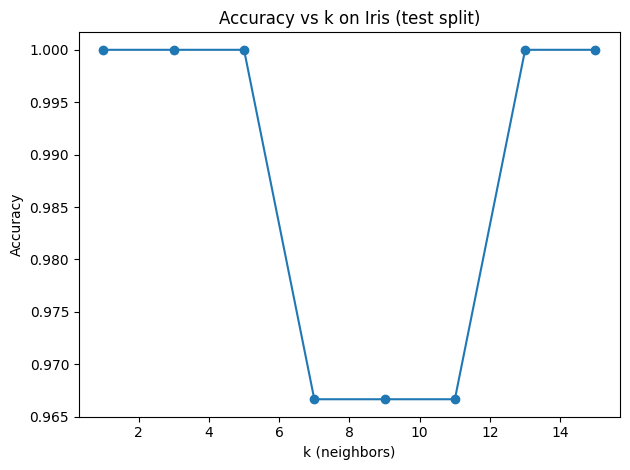

In [6]:
plt.figure()
plt.plot(ks, accs, marker="o")
plt.xlabel("k (neighbors)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k on Iris (test split)")
plt.tight_layout()
plt.show()


## 4) Reflection and troubleshooting (for peer programming)

### Reflection prompts
Discuss these with your partner (or write short notes):

- Which `k` performed best? Why might that be true for this dataset?
- What changes when you set `standardize=False`? (Explain using “distance” reasoning.)
- Compare **Euclidean** vs **Manhattan** distance. Do results change?
- Where does KNN struggle? (Think: overlapping classes, outliers, noisy features.)
- What are the trade-offs of “lazy learning” (prediction time, memory)?

### Peer comparison template
Fill in and compare:

- Dataset: Iris  
- Best `k`: ___  
- Accuracy: ___  
- Standardization: True / False  
- Distance metric: Euclidean / Manhattan  
- One key insight: ___

### Troubleshooting: `ModuleNotFoundError: No module named 'src'`
This happens when Python cannot find the project folder that contains `src/`.

Try one of these fixes:

1. **Open the correct folder in VS Code**  
   Open the folder that contains `src/`, then open the notebook inside `notebooks/`.

2. **Run scripts as a module (recommended):**
   ```bash
   python -m scripts.run_csv_iris
   ```

3. **(Notebook) Add project root to `sys.path`**  
   Add a new cell at the top:
   ```python
   import sys
   from pathlib import Path
   project_root = Path().resolve().parent  # if notebook is in notebooks/
   sys.path.insert(0, str(project_root))
   ```


## Presentation Talking Points (KNN Workshop)

### 1) Why preprocessing matters for KNN
KNN is a **distance-based** algorithm. If features are on different scales, the feature with larger values can dominate the distance calculation.  
**Standardizing features** (mean = 0, std = 1) helps ensure every feature contributes fairly, which often improves accuracy.

---

### 2) Pipeline Pattern (clean architecture)
This project follows a simple **Machine Learning Pipeline Pattern**:

**data → split → preprocess → train → evaluate**

Organizing the work into clear steps makes the solution:
- **Reproducible** (same process every run)
- **Testable** (each step can be checked independently)
- **Flexible** (easy to swap datasets, preprocessing, or models)

---

### 3) Choosing `k` = bias/variance trade-off
The value of `k` controls model complexity:
- **Small `k`** → more sensitive to noise → can **overfit**
- **Large `k`** → smoother decision boundary → can **underfit**

We choose `k` by trying multiple values and selecting the one with the best performance (e.g., highest accuracy).
